In [18]:
import control
from control.matlab import *
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [21]:
sc.linalg.eig(np.array([[1,2,-3],[2,0,5],[2,7,-2]]),np.array([[1,4,-3],[2,5,5],[10,7,-2]]))

(array([-0.36875017+0.j,  0.47627705+0.j,  1.        +0.j]),
 array([[-8.21513645e-01, -7.26495029e-01, -1.28763253e-16],
        [ 5.39979839e-01, -6.27510298e-01,  2.57526507e-16],
        [ 1.83131390e-01, -2.80063920e-01,  1.00000000e+00]]))

## Convolve and deconvolve

\begin{align}
&p_{1} = s^{2}+4s+3\\
&p_{2} = 4s^{4}+5s^{3}+6s^{2}+7s+8
\end{align}
```convolve```: $p_{1}\times p_{2} = ?$, return the multiplication

```deconvolve```: $p_{1}/p_{2}$, return numerator and denominator

In [22]:
p1 = np.array([1,4,3])
p2 = np.array([4,5,6,7,8])
sc.signal.convolve(p1,p2)
sc.signal.deconvolve(p1,p2)

([], array([1, 4, 3]))

In [23]:
np.roots(p1)

array([-3., -1.])

## Partial fractions

In [24]:
sc.signal.residue(p1,p2)

(array([-0.05298209-0.21294164j, -0.05298209+0.21294164j,
         0.05298209+0.0680925j ,  0.05298209-0.0680925j ]),
 array([ 0.34306934+1.13567166j,  0.34306934-1.13567166j,
        -0.96806934+0.69559666j, -0.96806934-0.69559666j]),
 array([], dtype=float64))

## Transfer function

In [25]:
tf(p1,p2)


         s^2 + 4 s + 3
-------------------------------
4 s^4 + 5 s^3 + 6 s^2 + 7 s + 8

### Polos

In [26]:
np.roots(p2)

array([ 0.34306934+1.13567166j,  0.34306934-1.13567166j,
       -0.96806934+0.69559666j, -0.96806934-0.69559666j])

### Ceros

In [27]:
np.roots(p1)

array([-3., -1.])

## Control library
```pzmap``` return poles and zeros, also plot the values.

(array([ 0.34306934+1.13567166j,  0.34306934-1.13567166j,
        -0.96806934+0.69559666j, -0.96806934-0.69559666j]),
 array([-3., -1.]))

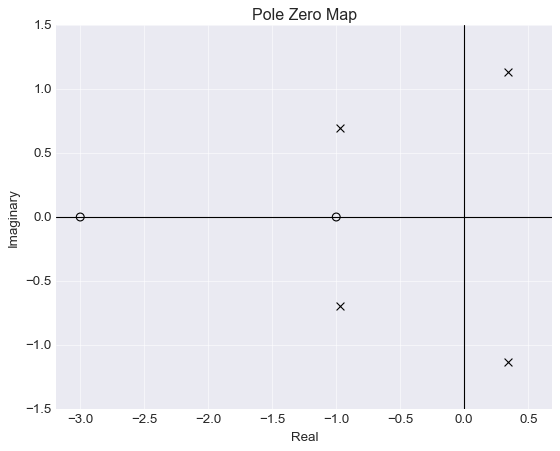

In [28]:
control.pzmap(tf(p1,p2))

## Transfer function to Space State

In [29]:
ss = control.tf2ss(tf(p1,p2))
n_ss = sc.signal.tf2ss(p1,p2)
print(ss)
print(n_ss)

A = [[-1.25 -1.5  -1.75 -2.  ]
 [ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.    0.  ]]

B = [[1.]
 [0.]
 [0.]
 [0.]]

C = [[0.   0.25 1.   0.75]]

D = [[0.]]

(array([[-1.25, -1.5 , -1.75, -2.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ]]), array([[1.],
       [0.],
       [0.],
       [0.]]), array([[0.  , 0.25, 1.  , 0.75]]), array([[0.]]))


In [30]:
_tf = ss2tf(ss)
print(_tf)


-2.442e-15 s^3 + 0.25 s^2 + s + 0.75
-------------------------------------
s^4 + 1.25 s^3 + 1.5 s^2 + 1.75 s + 2



# Time Response Analysis

In [37]:
def multiply_poly(a):
    p1 = np.array([1])
    for i in range(len(a)):
        polynom = np.array(a[i])
        p1 = sc.signal.convolve(p1, polynom)
    return p1

In [52]:
transfer_function = tf(multiply_poly([[1,3]]), multiply_poly([[1,0],[1,2],[1,4],[1,5]]))
print(transfer_function)
transfer_function = zpk2tf([-3],[0,-2,-4,-5],1)
print(transfer_function)


            s + 3
----------------------------
s^4 + 11 s^3 + 38 s^2 + 40 s

(array([1., 3.]), array([ 1., 11., 38., 40.,  0.]))


## Second Order

In [191]:
def solve_second(den):
    time = np.linspace(0,4,100)
    b = den[2]
    a = den[1]
    wn = np.sqrt(b)
    zeta = a/(2*wn)
    
    flag = False
    
    print("ωn=",wn)
    print("ζ=",zeta)
    
    if(zeta == 0):
        flag = True
        print("Undamped")
    elif(zeta > 0 and zeta < 1):
        flag = True
        print("Underdamped")
    elif(zeta == 1):
        print("Critically Damped")
    elif(zeta > 1):
        print("Overdamped")
    
    if(flag):
        coeff = 1/(np.sqrt(1-zeta*zeta))
        phi = np.arctan(zeta/np.sqrt(1-zeta*zeta))
        angle_arg = wn*np.sqrt(1-zeta*zeta)
        exp_arg = -zeta*wn    
        
        Tp = np.pi/(angle_arg)
        Ts = 4/(zeta*wn)
        wd = wn*np.sqrt(1-zeta*zeta)
        beta = np.arctan(abs(wd/(zeta*wn)))
        Tr = (np.pi-beta)/wd
        OS = 100*np.exp(-zeta*np.pi/(np.sqrt(1-zeta**2)))
        print("Tp=",Tp)
        print("Tr=",Tr)
        print("Ts=",Ts)
        print("%OS=",OS)
        
        exp_part = "1-"+str(np.around(coeff,5))+"*e^("+str(np.around(exp_arg,5))+"*t)"
        cos_part = "cos("+str(np.around(angle_arg,5))+"*t"
        if(phi > 0):
            cos_part += "-"+str(np.around(phi,5))+")"
        else:
            cos_part += "+"+str(np.around(phi,5))+")"

        print(exp_part+"*"+cos_part)
        
        
        plt.figure(figsize=(6,4))
        plt.plot(time, 1-coeff*np.exp(exp_arg*time)*np.cos(angle_arg*time-phi))
    else:
        if(zeta==1):
            print("1-e^(-"+str(np.around(wn,5))+"*t)*(1+"+str(np.around(wn,5))+"*t)")
            plt.figure(figsize=(6,4))
            plt.plot(time, 1-np.exp(-wn*time)*(1+wn*time))
        else:
            print("1-e^(-"+str(np.around(wn*(zeta-np.sqrt(zeta*zeta-1)),5))+"*t)")
            plt.figure(figsize=(6,4))
            plt.plot(time, 1-np.exp(-(zeta-np.sqrt(zeta*zeta-1))*wn*time))
            

ωn= 4.0
ζ= 0.5
Underdamped
Tp= 0.9068996821171089
Tr= 0.6045997880780727
Ts= 2.0
%OS= 16.303353482158048
1-1.1547*e^(-2.0*t)*cos(3.4641*t-0.5236)


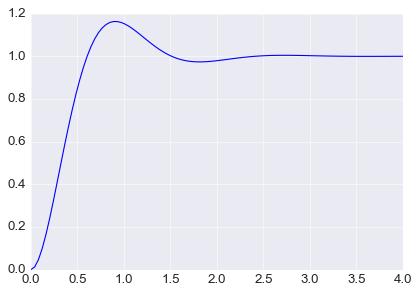

In [192]:
solve_second([1,4,16])